# 计算新闻传播学 HOMEWORK8
***
## 王凯伦  15210130081

## 1. 构建networkx的网络对象g（提示：有向网络），将www数据添加到g当中

In [25]:
%matplotlib inline
import networkx as nx
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [3]:
import sys
def flushPrint(s):
    sys.stdout.write('\r')
    sys.stdout.write('%s' % s)
    sys.stdout.flush()

In [43]:
# 只能构建出一个无向网络
G = nx.Graph()
n = 0
with open ('E:/WODE/M Homework/cjc2016/data/www.dat.gz.txt') as f:
    for line in f:
        n += 1
        if n % 10**4 == 0:
            flushPrint(n)
        x, y = line.rstrip().split(' ')
        G.add_edge(x,y)

1490000

In [45]:
# 构建有向网络
G = nx.DiGraph()
n = 0
with open ('E:/WODE/M Homework/cjc2016/data/www.dat.gz.txt') as f:
    for line in f:
        n += 1
        x, y = line.rstrip().split(' ')
        G.add_edge(x,y)

## 2. 描述网络

In [57]:
# 网络中的节点数量和链接数量
nx.info(G)

'Name: \nType: DiGraph\nNumber of nodes: 325729\nNumber of edges: 1497134\nAverage in degree:   4.5963\nAverage out degree:   4.5963'

In [48]:
# www网络的网络密度
nx.density(G)

1.4110719364589702e-05

In [49]:
nodeNum = len(G.nodes())
edgeNum = len(G.edges())

2.0*edgeNum/(nodeNum * (nodeNum - 1))

2.8221438729179403e-05

## 3. 绘制www网络的出度分布、入度分布

In [51]:
dc = nx.degree_centrality(G)
in_degree = nx.in_degree_centrality(G) 
out_degree = nx.out_degree_centrality(G)

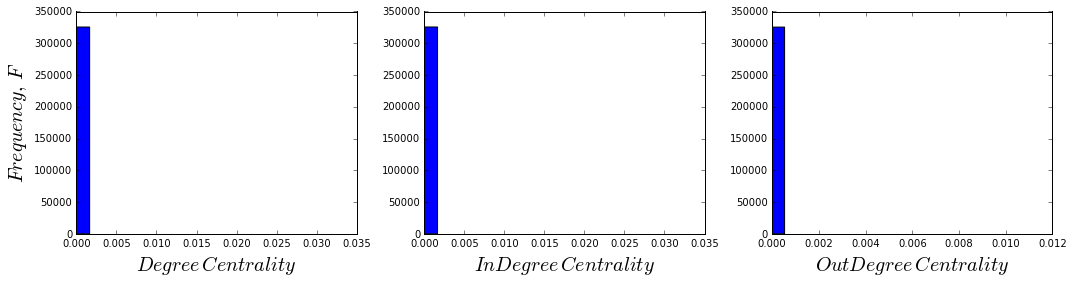

In [56]:
fig = plt.figure(figsize=(15, 4),facecolor='white')
ax = plt.subplot(1, 3, 1)
plt.hist(dc.values(), bins = 20)
plt.xlabel('$Degree \, Centrality$', fontsize = 20)
plt.ylabel('$Frequency, \, F$', fontsize = 20)

ax = plt.subplot(1, 3, 2)
plt.hist(in_degree.values(), bins = 20)
plt.xlabel('$InDegree \, Centrality$', fontsize = 20)

ax = plt.subplot(1, 3, 3)
plt.hist(out_degree.values(), bins = 20)
plt.xlabel('$OutDegree \, Centrality$', fontsize = 20)
plt.tight_layout()
plt.show()

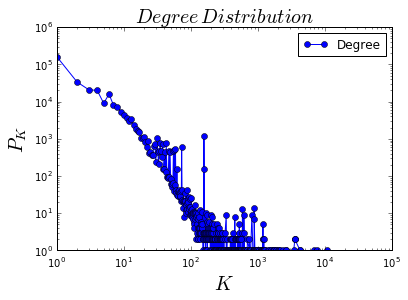

In [11]:
from collections import defaultdict
import numpy as np

def plotDegreeDistribution(G):
    degs = defaultdict(int)
    for i in G.degree().values(): degs[i]+=1
    items = sorted ( degs.items () )
    x, y = np.array(items).T
    plt.plot(x, y, 'b-o')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend(['Degree'])
    plt.xlabel('$K$', fontsize = 20)
    plt.ylabel('$P_K$', fontsize = 20)
    plt.title('$Degree\,Distribution$', fontsize = 20)
    plt.show()   
       
plotDegreeDistribution(G)

## 4. BA模型

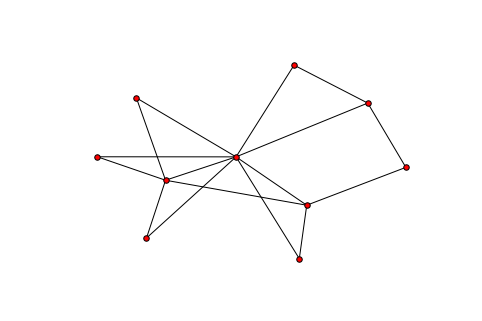

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

BA= nx.random_graphs.barabasi_albert_graph(10,2)  #生成n=10、m=2的BA无标度网络
pos = nx.spring_layout(BA)          #定义一个布局，此处采用了spring布局方式
nx.draw(BA,pos,with_labels=False,node_size = 30)  #绘制图形
plt.show()

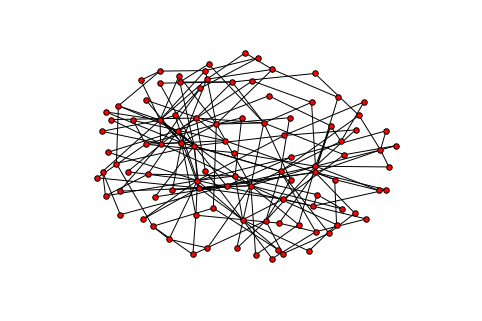

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

BA= nx.random_graphs.barabasi_albert_graph(100,2)  #生成n=100、m=2的BA无标度网络
pos = nx.spring_layout(BA)          #定义一个布局，此处采用了spring布局方式
nx.draw(BA,pos,with_labels=False,node_size = 30)  #绘制图形
plt.show()

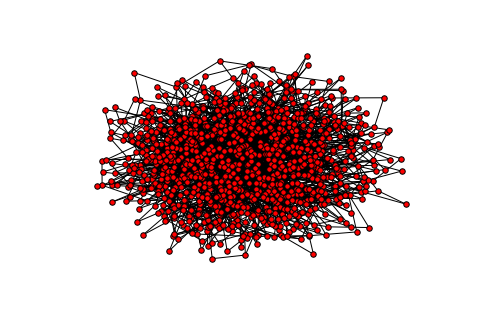

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

BA= nx.random_graphs.barabasi_albert_graph(1000,2)  #生成n=1000、m=2的BA无标度网络
pos = nx.spring_layout(BA)          #定义一个布局，此处采用了spring布局方式
nx.draw(BA,pos,with_labels=False,node_size = 30)  #绘制图形
plt.show()

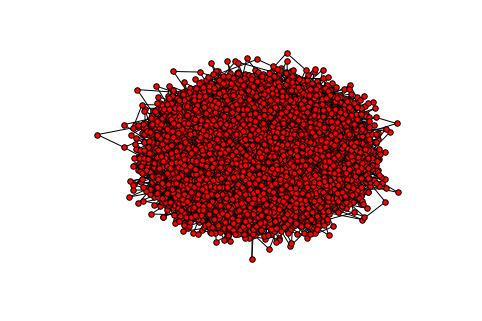

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

BA= nx.random_graphs.barabasi_albert_graph(10000,2)  #生成n=10000、m=2的BA无标度网络
pos = nx.spring_layout(BA)          #定义一个布局，此处采用了spring布局方式
nx.draw(BA,pos,with_labels=False,node_size = 30)  #绘制图形
plt.show()

In [62]:
Ns = [i*10 for i in [1, 10, 100, 1000]]
ds = []
for N in Ns:
    print N
    BA= nx.random_graphs.barabasi_albert_graph(N,2)
    d = nx.average_shortest_path_length(BA)
    ds.append(d)

10
100
1000
10000


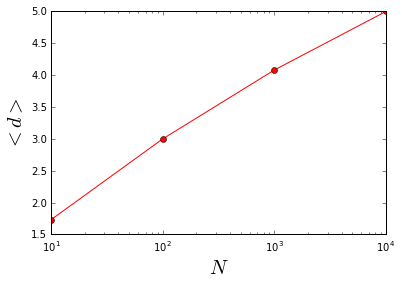

In [63]:
plt.plot(Ns, ds, 'r-o')
plt.xlabel('$N$', fontsize = 20)
plt.ylabel('$<d>$', fontsize = 20)
plt.xscale('log')
plt.show()